In [1]:
import os
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import patches
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")

# General Overview & Inspection

In [2]:
df = pd.read_csv('./Data/creditcard.csv')

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,'0'
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,'0'
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,'0'
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,'0'
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,'0'


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


In [4]:
'''Check Null values'''
df.isnull().sum().max()

0

In [5]:
'''Identify numerical features vs categorical features'''
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)

Numerical Features: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
Categorical Features: ['Class']


# Target Variable Exploration

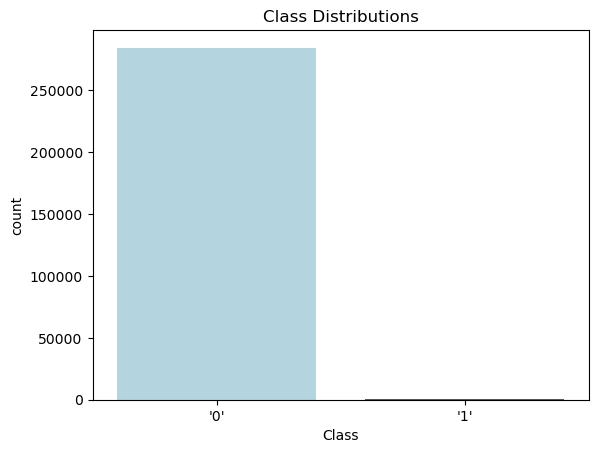

In [6]:
sns.countplot(x='Class', data=df, palette=['lightblue', 'red'])
plt.title('Class Distributions')
plt.show()

In [7]:
non_fraud = round(df['Class'].value_counts(normalize=True)[0] * 100, 2)
fraud = round(df['Class'].value_counts(normalize=True)[1] * 100, 2)

print(f'Non Frauds: {non_fraud}% of the dataset')
print(f'Frauds: {fraud}% of the dataset')

Non Frauds: 99.83% of the dataset
Frauds: 0.17% of the dataset


# Scaling & Splitting of Data

In [8]:
scaler = RobustScaler() # More robust for outliers

df['Amount'] = scaler.fit_transform(df[['Amount']])
df['Time'] = scaler.fit_transform(df[['Time']])

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,'0'
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,'0'
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,'0'
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,'0'
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,'0'


In [9]:
# Split features and target
X = df.drop('Class', axis=1)
y = df['Class'].str.replace("'", "").astype(int)  # Clean and convert labels

# Split once with stratification to preserve class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Save train data
train_df = X_train.copy()
train_df['Class'] = y_train
train_df.to_csv(os.path.join('Data', 'train_data.csv'), index=False)

# Save test data
test_df = X_test.copy()
test_df['Class'] = y_test
test_df.to_csv(os.path.join('Data', 'test_data.csv'), index=False)

# Check distribution
print("Original Distribution:", np.bincount(y) / len(y))
print("Train Distribution   :", np.bincount(y_train) / len(y_train))
print("Test Distribution    :", np.bincount(y_test) / len(y_test))


Original Distribution: [0.99827251 0.00172749]
Train Distribution   : [0.99827075 0.00172925]
Test Distribution    : [0.99827955 0.00172045]


# Feature Exploration

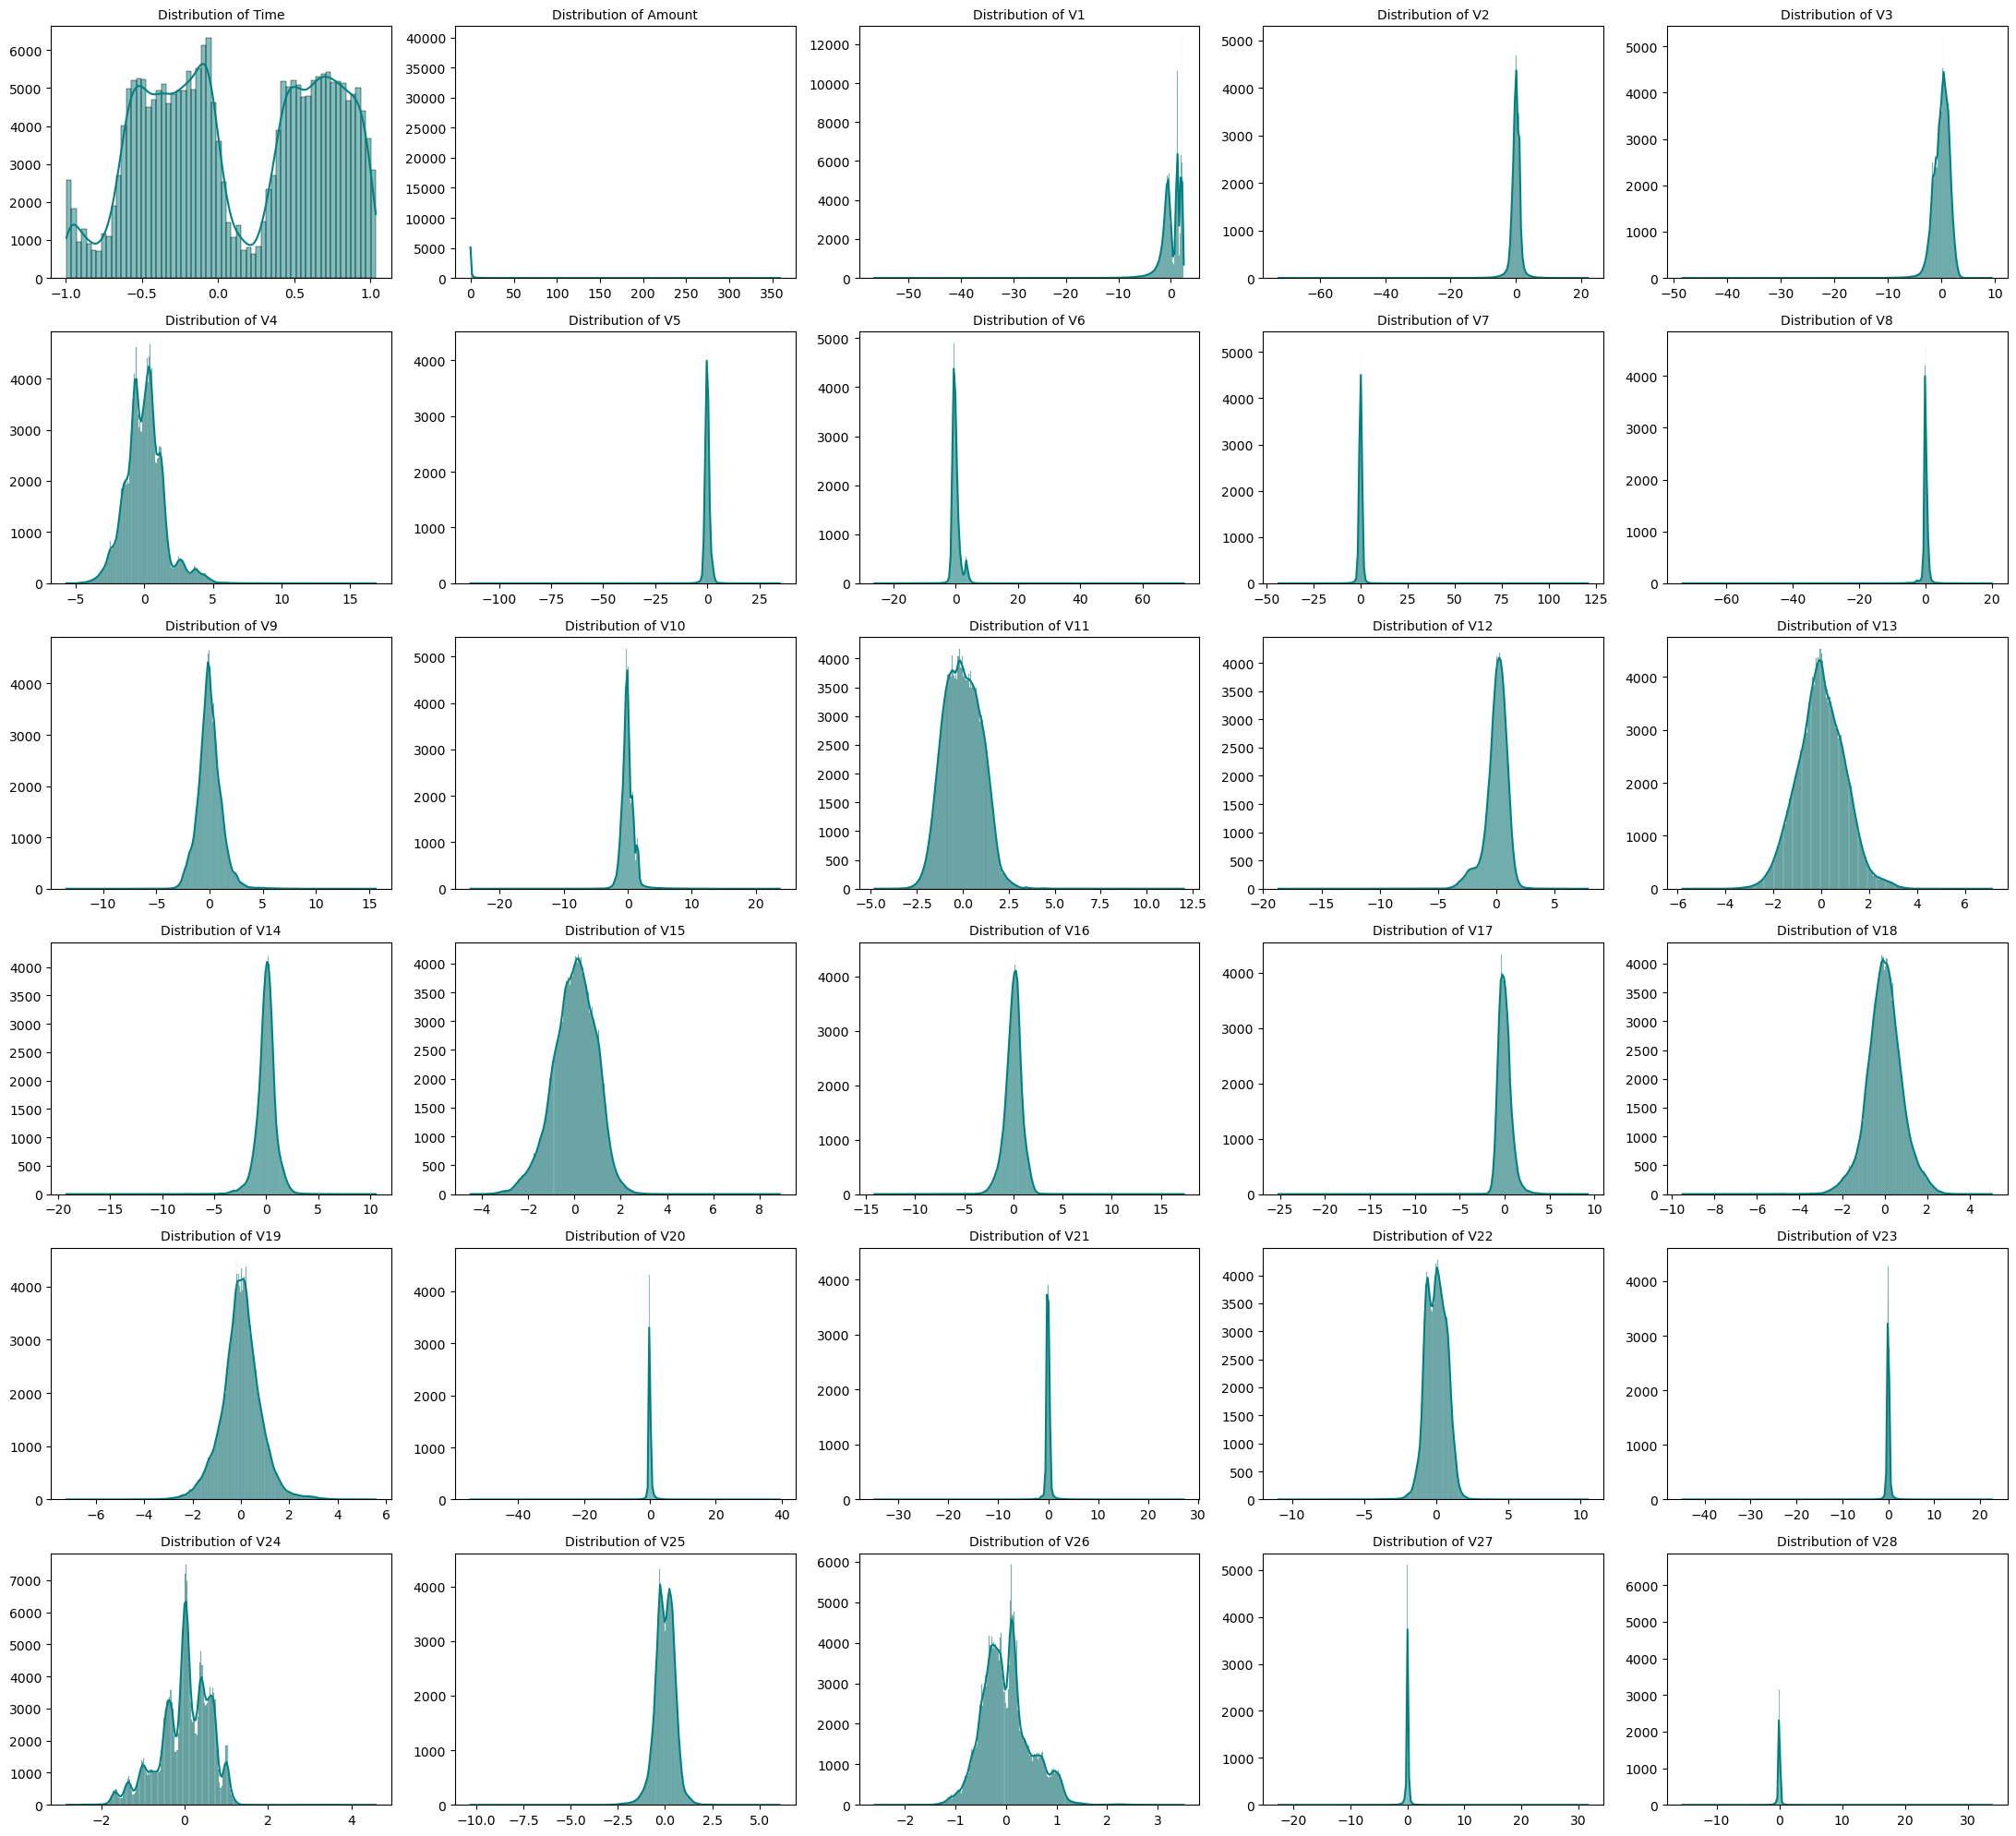

In [10]:
'''Histograms for Checking the Skewness'''

features = ['Time', 'Amount'] + [f'V{i}' for i in range(1, 29)]

# Create subplots
rows, cols = 6, 5 
fig, axes = plt.subplots(rows, cols, figsize=(22, 20))
axes = axes.flatten()

# Plot histograms for each feature
for i, feature in enumerate(features):
    sns.histplot(X_train[feature].values, ax=axes[i], kde=True, color='teal')
    axes[i].set_title(f'Distribution of {feature}', fontsize=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Hide any unused subplots (if any)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

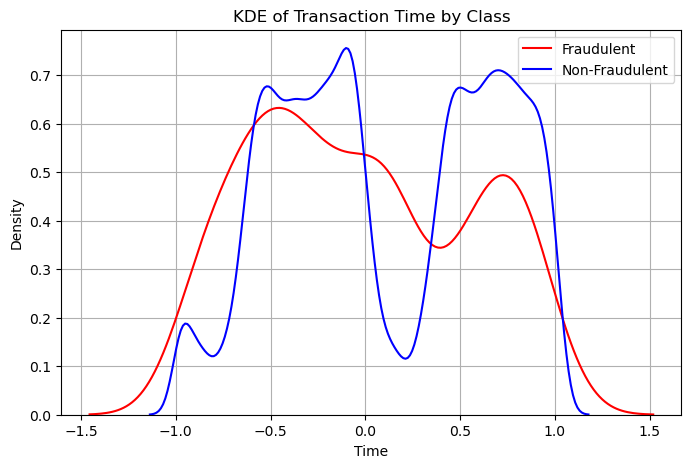

In [11]:
'''Observe the distribution of classes with time'''
plt.figure(figsize=(8, 5))

# Plot the KDE line for fraudulent transactions
sns.kdeplot(X_train.loc[y_train == 1, 'Time'], label='Fraudulent', color='red', fill=False)

# Plot the KDE line for non-fraudulent transactions
sns.kdeplot(X_train.loc[y_train == 0, 'Time'], label='Non-Fraudulent', color='blue', fill=False)

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Density')
plt.title('KDE of Transaction Time by Class')
plt.legend()
plt.grid(True)
plt.show()

### Analysis
We do not see any specific pattern for the fraudulent and non-fraudulent transctions with respect to Time.

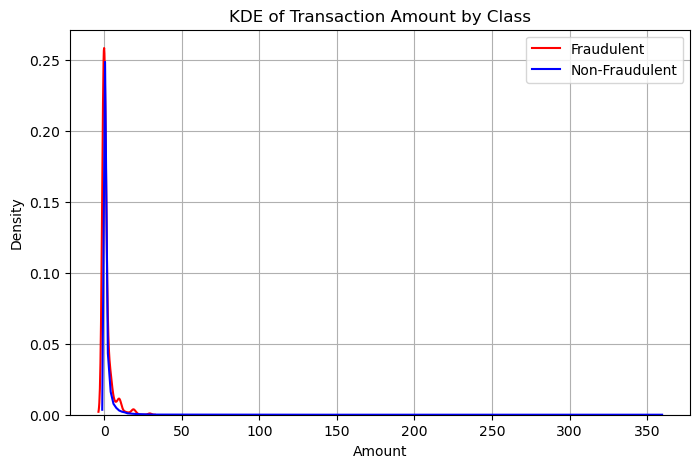

In [12]:
'''Observe the distribution of classes with amount'''
plt.figure(figsize=(8, 5))

# Plot the KDE line for fraudulent transactions
sns.kdeplot(X_train.loc[y_train == 1, 'Amount'], label='Fraudulent', color='red', fill=False)

# Plot the KDE line for non-fraudulent transactions
sns.kdeplot(X_train.loc[y_train == 0, 'Amount'], label='Non-Fraudulent', color='blue', fill=False)

# Add labels and title
plt.xlabel('Amount')
plt.ylabel('Density')
plt.title('KDE of Transaction Amount by Class')
plt.legend()
plt.grid(True)
plt.show()

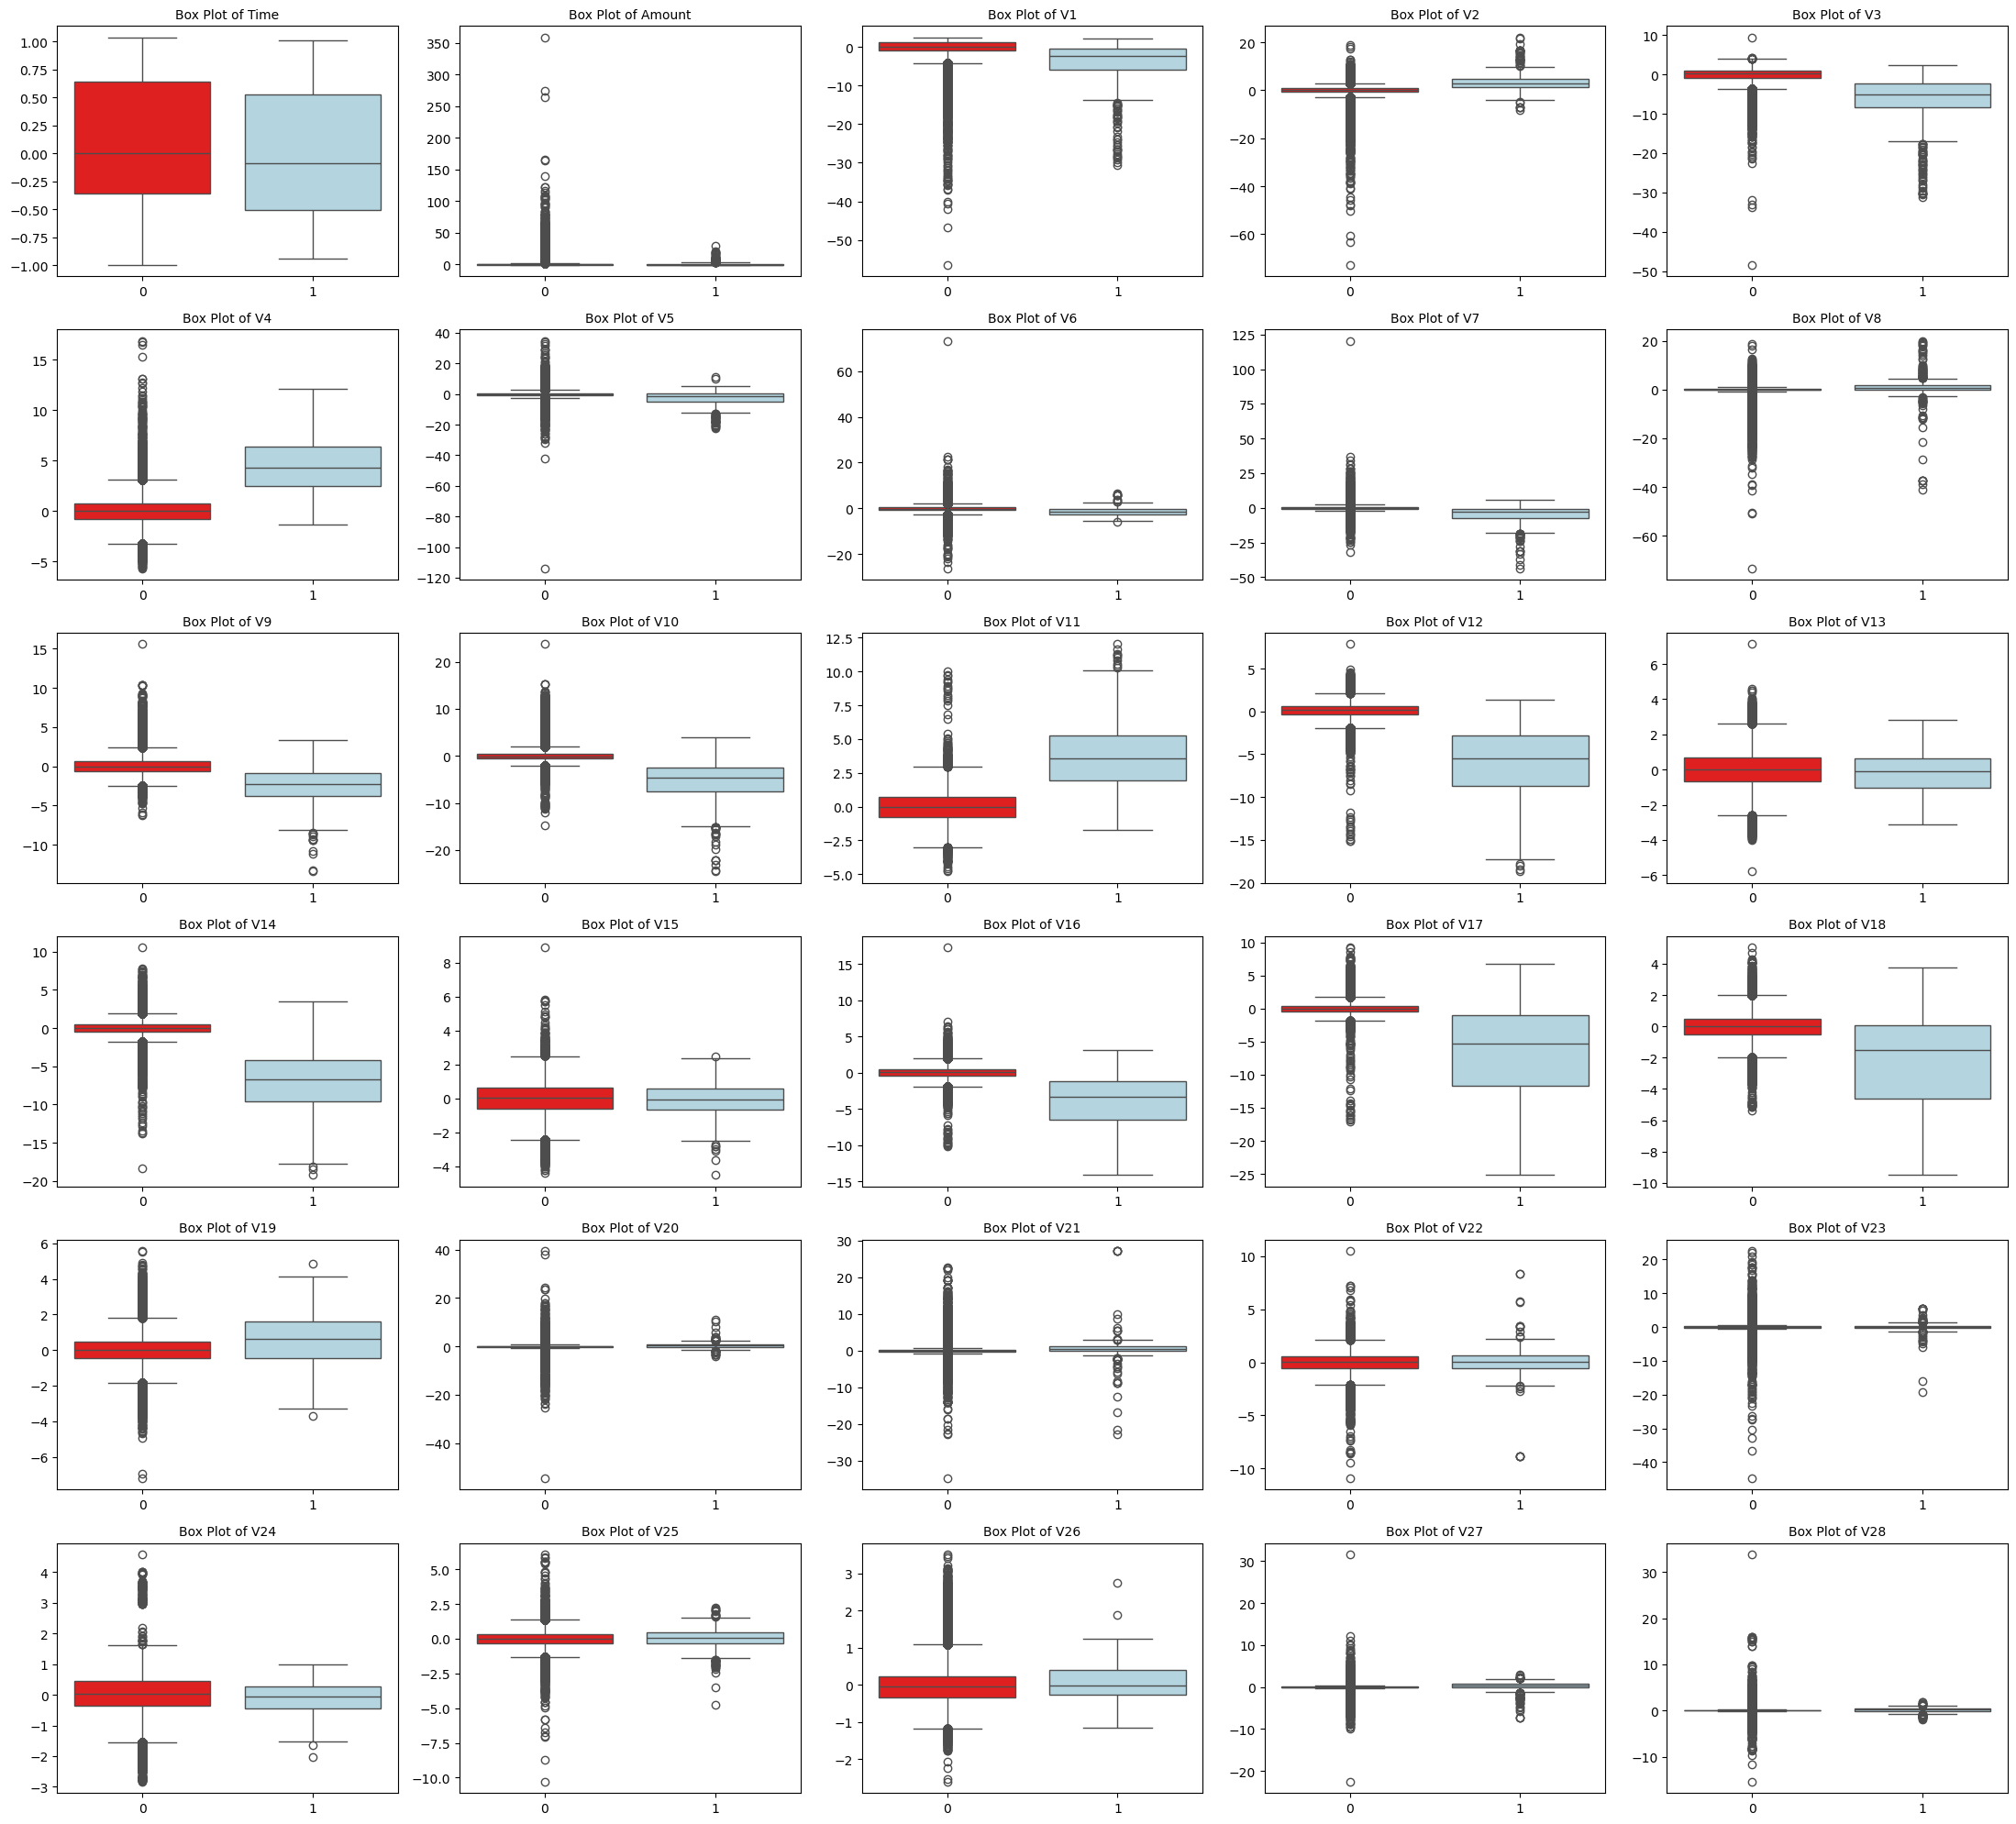

In [13]:
'''Box plots'''

features = ['Time', 'Amount'] + [f'V{i}' for i in range(1, 29)]

# Create subplots
rows, cols = 6, 5 
fig, axes = plt.subplots(rows, cols, figsize=(22, 20))
axes = axes.flatten()

# Plot box plots
for i, feature in enumerate(features):
    sns.boxplot(x=y_train, y=X_train[feature].values, ax=axes[i], palette=['red', 'lightblue'])
    axes[i].set_title(f'Box Plot of {feature}', fontsize=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Hide any unused axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

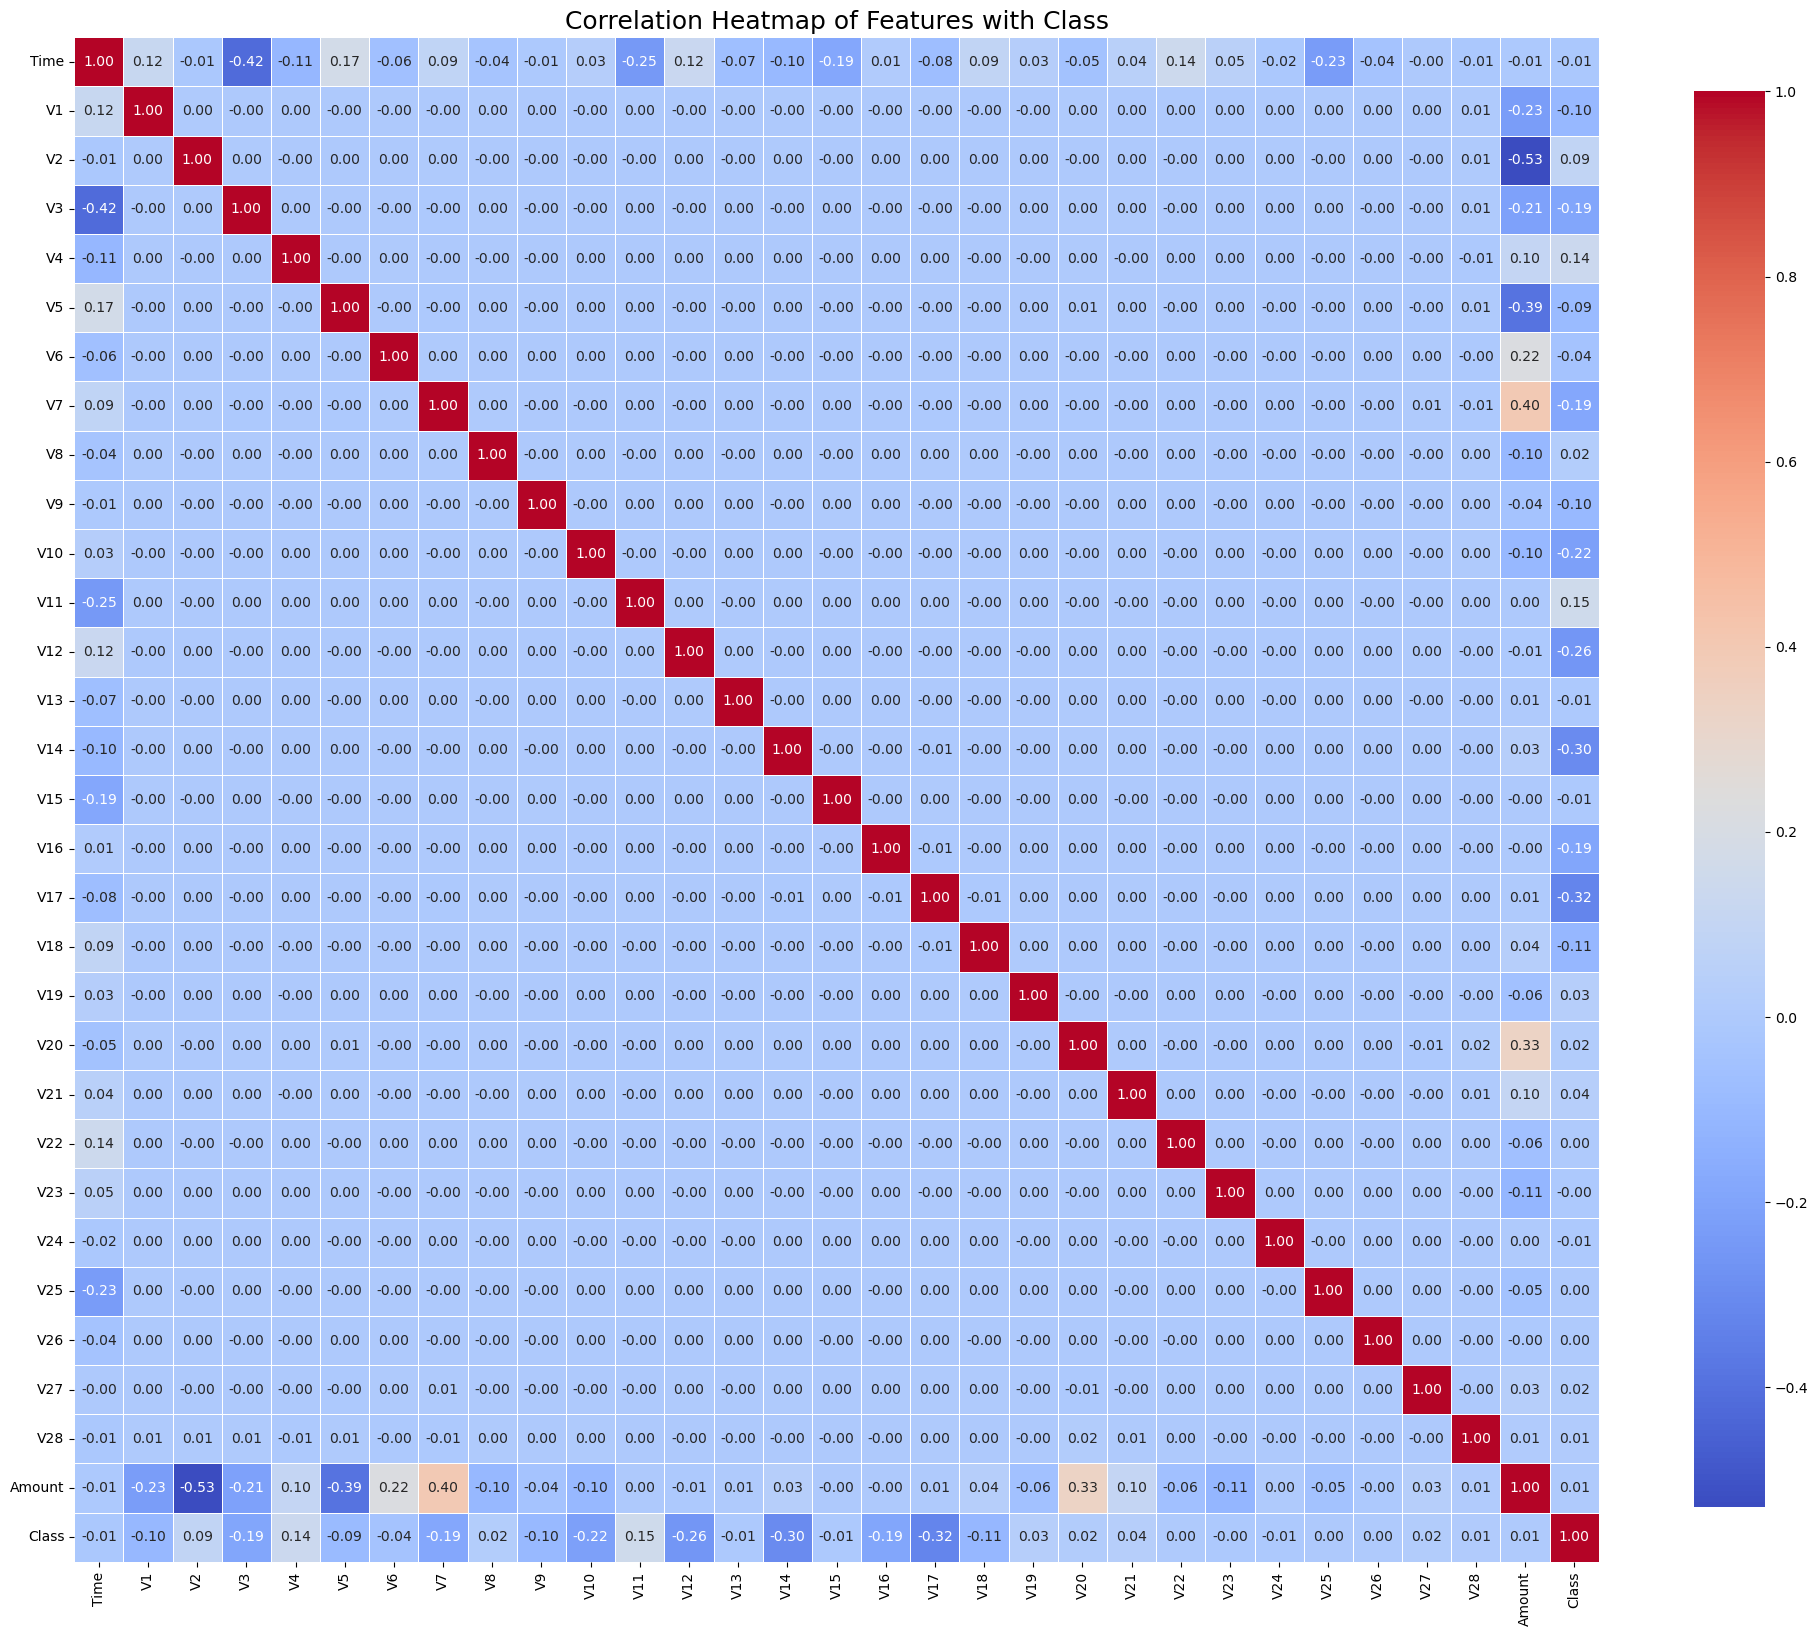

In [14]:
'''Correlation heatmap'''
df_corr = X_train.copy()
df_corr['Class'] = y_train

# Calculate correlation matrix
corr_matrix = df_corr.corr()

# Plot the heatmap
plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm', 
            linewidths=0.5,
            square=True, 
            cbar_kws={"shrink": 0.8})

plt.title('Correlation Heatmap of Features with Class', fontsize=18)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Based on the box plots & correlation heatmap, we observe that features V4 and V11 exhibit a positive correlation with fraud — as the values of these features increase, the likelihood of a transaction being fraudulent also increases.

In contrast, features V3, V7, V10, V12, V14, V16, V17, and V18 show a negative correlation with fraud, indicating that lower values of these features are more associated with fraudulent transactions.

# Outliers Removal

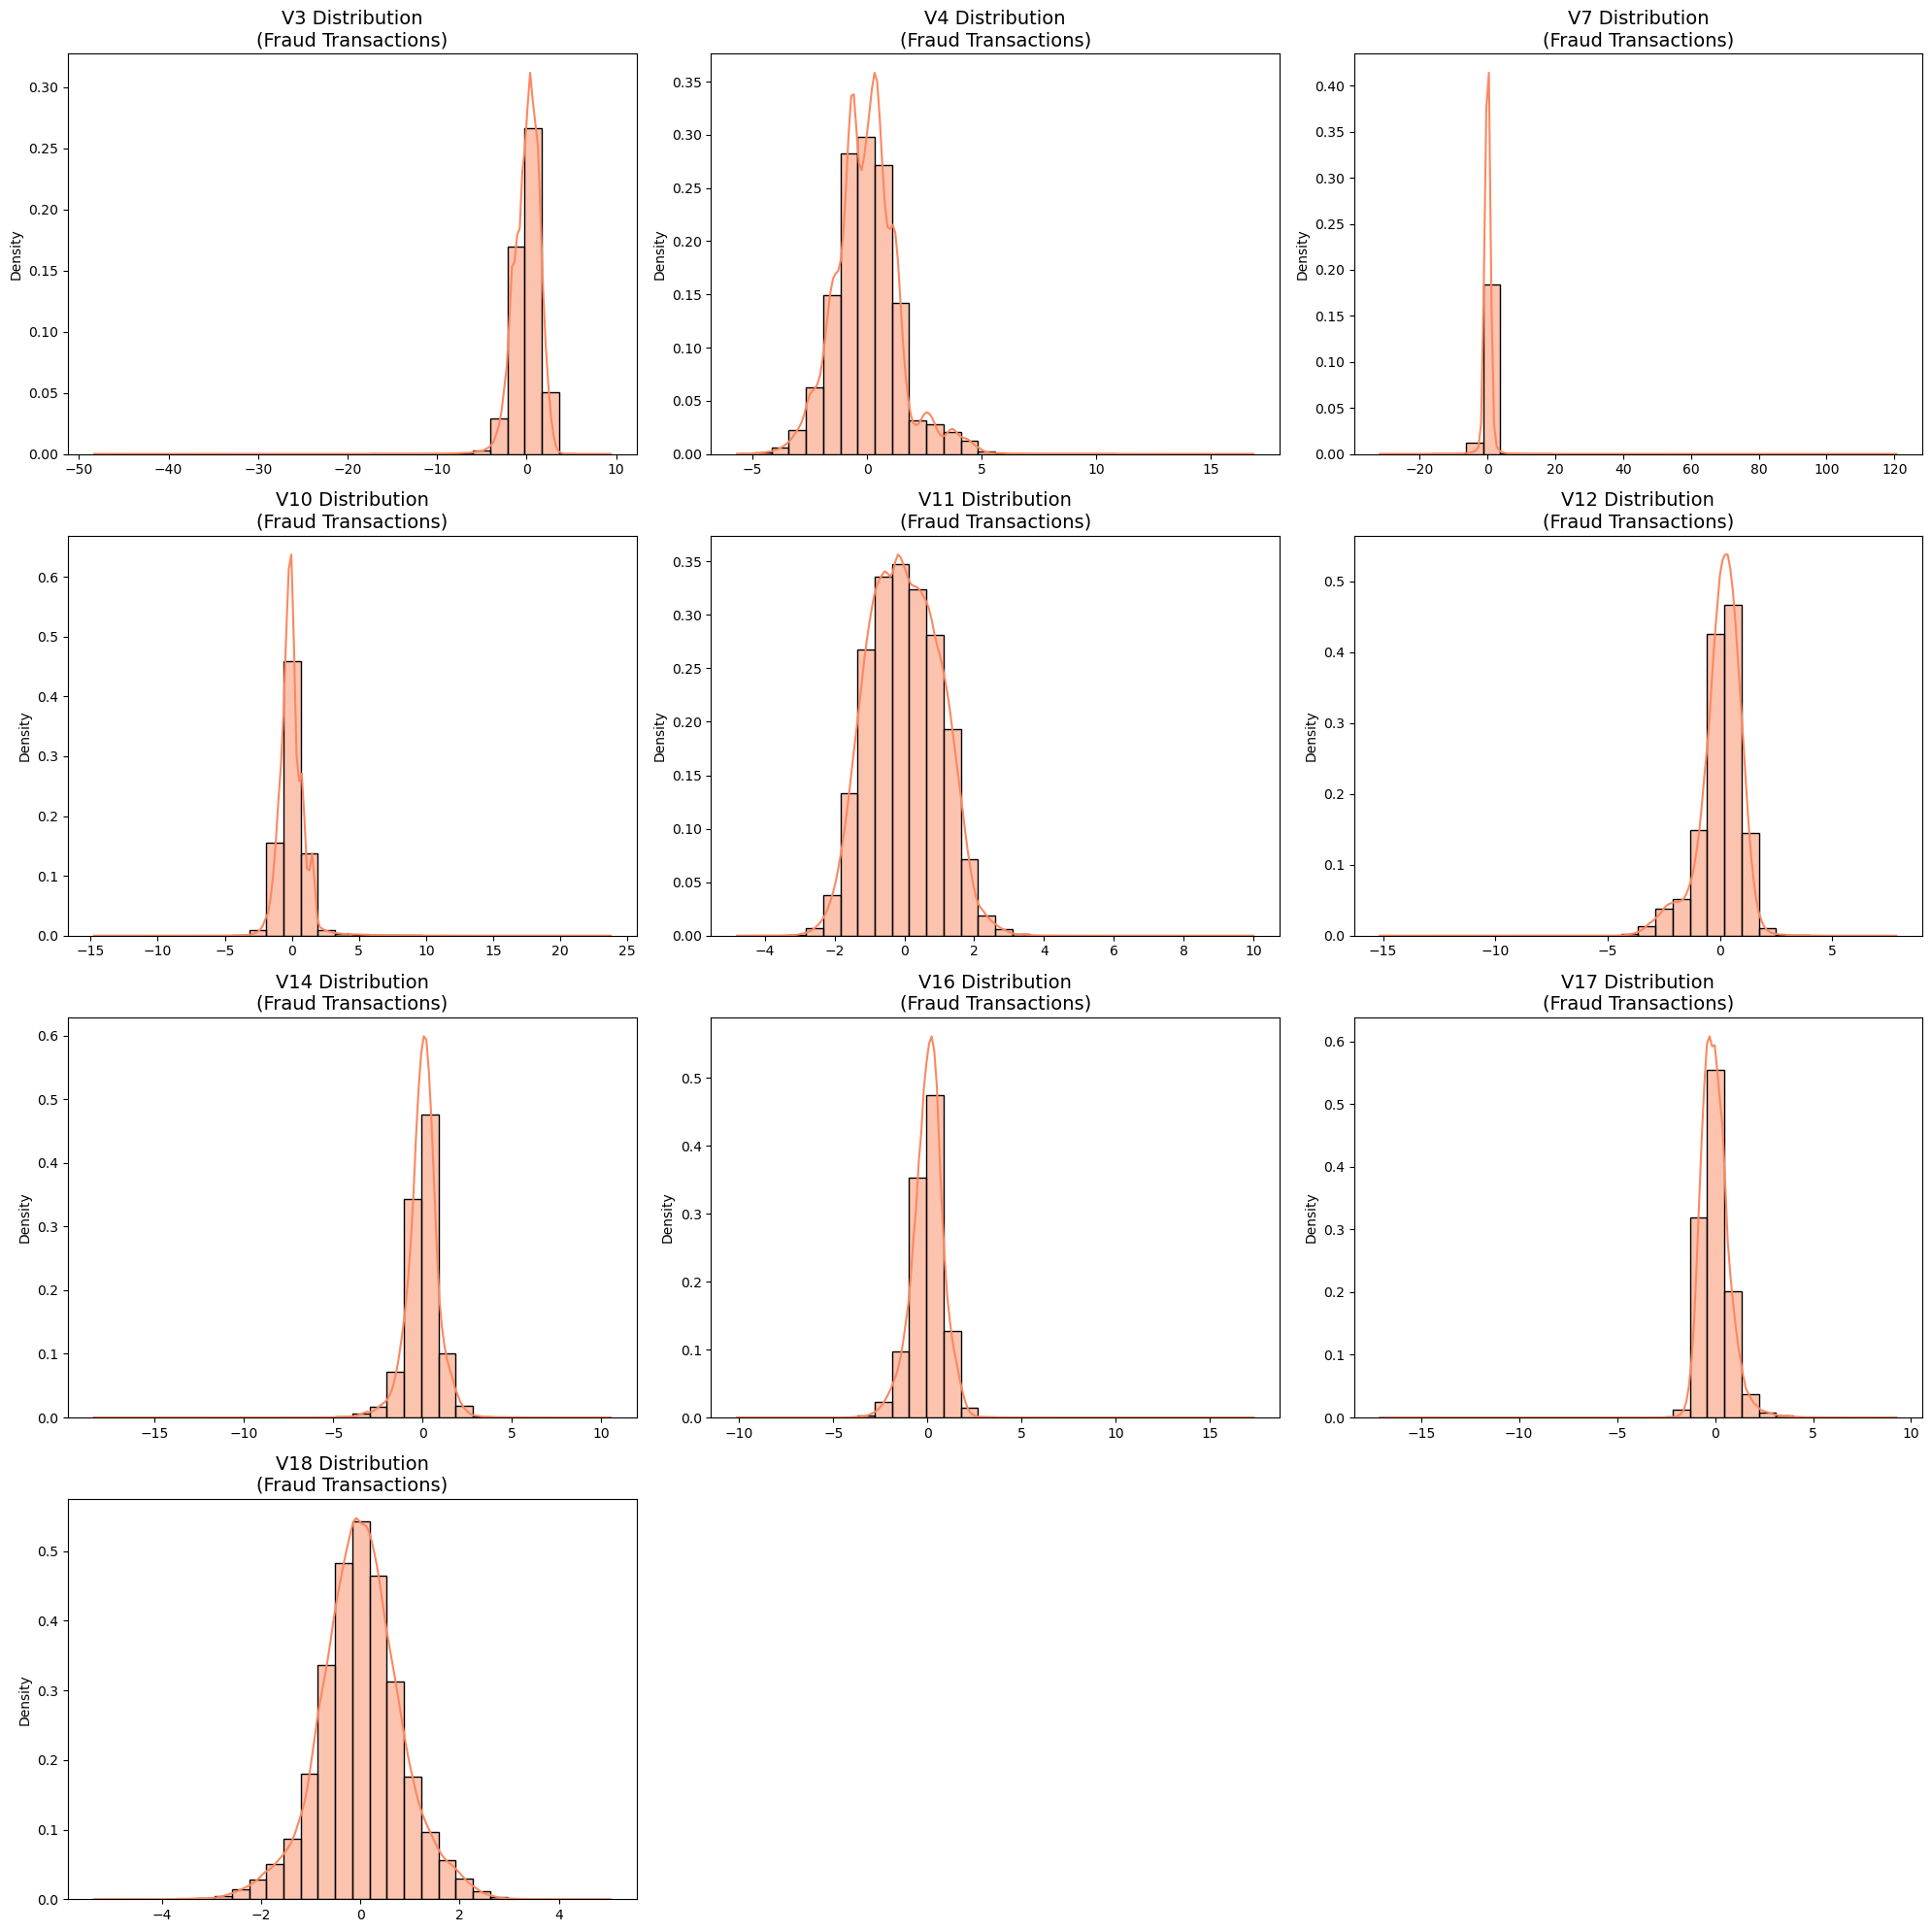

In [15]:

# Define features based on correlation with fraud
correlated_features = ['V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18']

# Set up subplots
num_features = len(correlated_features)
cols = 3
rows = (num_features + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()

for i, feature in enumerate(correlated_features):
    fraud_values = X_train[feature].loc[y_train == 0].values
    sns.histplot(fraud_values, ax=axes[i], kde=True, color='#FB8861', stat="density", bins=30)
    axes[i].set_title(f'{feature} Distribution\n(Fraud Transactions)', fontsize=14)

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [16]:
# Fraudulent transactions are outliers by nature so I removed outliers from the non-fraud transacions only.
def remove_outliers_non_fraud_only(X_train, y_train, feature):
    fraud_data = X_train[feature].loc[y_train == 0].values
    q25, q75 = np.percentile(fraud_data, 25), np.percentile(fraud_data, 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off

    outliers = [x for x in fraud_data if x < lower or x > upper]
    print(f"{feature} Outliers: {len(outliers)}")

    # Combine X and y to ensure consistent row removal
    combined = X_train.copy()
    combined['Class'] = y_train

    initial_len = len(combined)

    # Drop non-fraud outliers only
    combined = combined.drop(combined[(combined['Class'] == 0) & 
                                      ((combined[feature] < lower) | 
                                       (combined[feature] > upper))].index)

    print(f"Removed {initial_len - len(combined)} rows from {feature}")
    print('----' * 20)

    # Return separated X and y again
    y_train_cleaned = combined['Class']
    X_train_cleaned = combined.drop(columns='Class')
    return X_train_cleaned, y_train_cleaned


In [31]:
# Features to clean
features_to_clean = ['V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18']

# Run for each feature
for feature in features_to_clean:
    X_train_cleaned, y_train_cleaned = remove_outliers_non_fraud_only(X_train, y_train, feature)
    
# Select only the desired features from the DataFrame
X_train_cleaned = X_train_cleaned[['V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18']]
train_data = pd.DataFrame(X_train_cleaned)
train_data['Class'] = y_train_cleaned
train_data.to_csv(os.path.join('Data', "extracted_features_train_data.csv"), index=False)

V3 Outliers: 2464
Removed 2464 rows from V3
--------------------------------------------------------------------------------
V4 Outliers: 8765
Removed 8765 rows from V4
--------------------------------------------------------------------------------
V7 Outliers: 6891
Removed 6891 rows from V7
--------------------------------------------------------------------------------
V10 Outliers: 7263
Removed 7263 rows from V10
--------------------------------------------------------------------------------
V11 Outliers: 382
Removed 382 rows from V11
--------------------------------------------------------------------------------
V12 Outliers: 12022
Removed 12022 rows from V12
--------------------------------------------------------------------------------
V14 Outliers: 11042
Removed 11042 rows from V14
--------------------------------------------------------------------------------
V16 Outliers: 6290
Removed 6290 rows from V16
---------------------------------------------------------------------

# Dimensionality Reduction and Clustering

In [18]:
# PCA Implementation
t0 = time.time()
pca = PCA(n_components=2, random_state=42)
X_reduced_pca = pca.fit_transform(X_train.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X_train.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

PCA took 0.066 s
Truncated SVD took 0.68 s


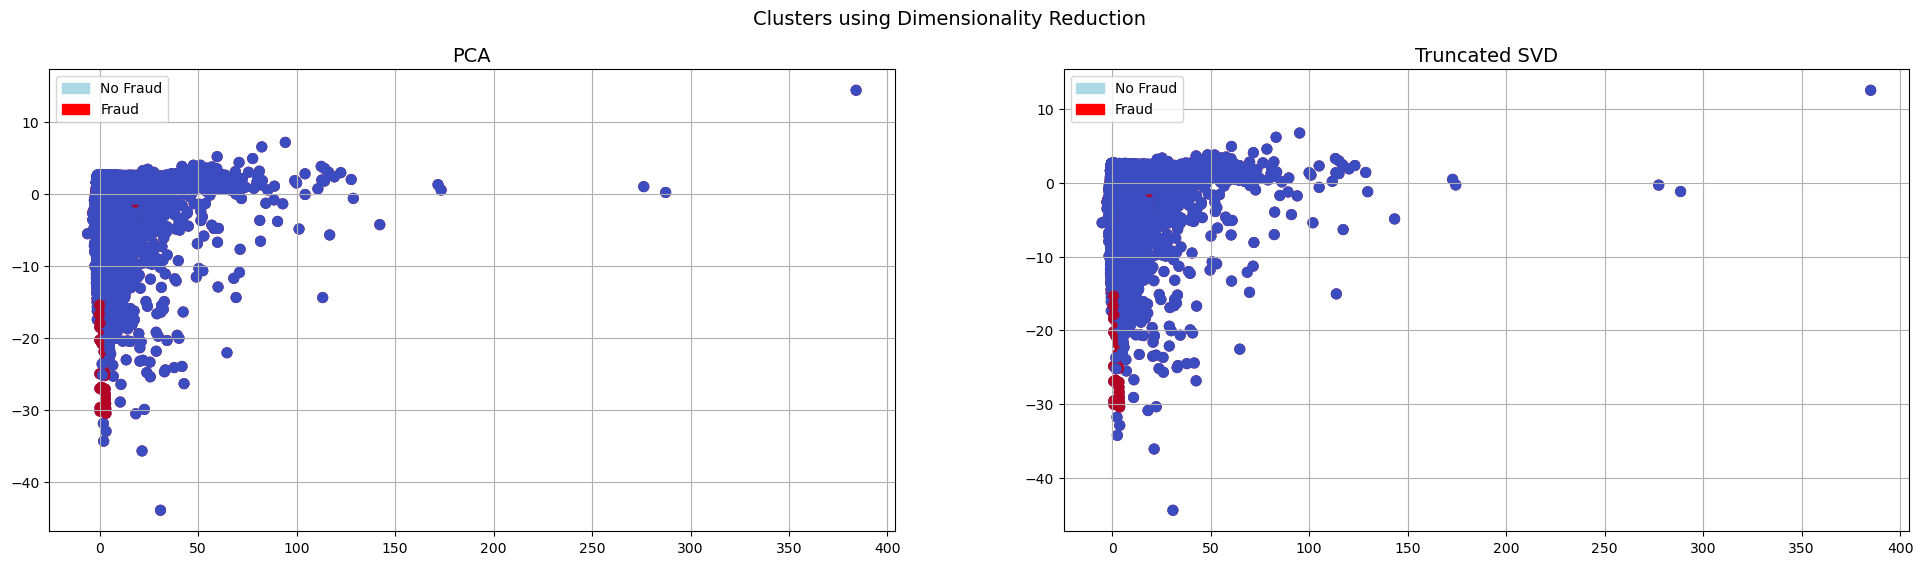

In [27]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,6))

f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)

blue_patch = patches.Patch(color='lightblue', label='No Fraud')
red_patch = patches.Patch(color='red', label='Fraud')

# PCA scatter plot
ax1.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y_train == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y_train == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('PCA', fontsize=14)
ax1.grid(True)
ax1.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax2.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y_train == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y_train == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('Truncated SVD', fontsize=14)
ax2.grid(True)
ax2.legend(handles=[blue_patch, red_patch])

plt.show()

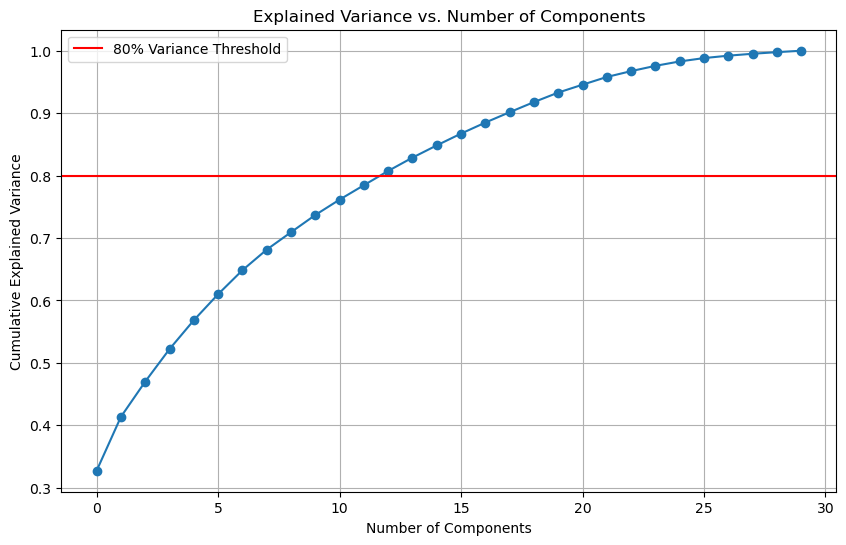

Cumulative explained variance with 2 components: 0.413721192182943


In [29]:
# Check explained variance ratio with PCA
pca = PCA(random_state=42)
pca.fit(X_train.values)

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.axhline(y=0.8, color='r', linestyle='-', label='80% Variance Threshold')
plt.grid(True)
plt.legend()
plt.show()

print("Cumulative explained variance with 2 components:", 
      np.sum(pca.explained_variance_ratio_[:2]))

# Under-sampling

In [20]:
print("Original class distribution:", Counter(y_train))

# Apply undersampling
undersampler = RandomUnderSampler(random_state=42)
X_undersampled, y_undersampled = undersampler.fit_resample(X_train, y_train)

print("Undersampled class distribution:", Counter(y_undersampled))

# Save train (undersampled)
train_data = pd.DataFrame(X_undersampled)
train_data['Class'] = y_undersampled
train_data.to_csv(os.path.join('Data', "undersampled_train_data.csv"), index=False)

Original class distribution: Counter({0: 227451, 1: 394})
Undersampled class distribution: Counter({0: 394, 1: 394})


In [21]:
# Features to clean
features_to_clean = ['V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18']

# Run for each feature
for feature in features_to_clean:
    X_train_cleaned, y_train_cleaned = remove_outliers_non_fraud_only(X_undersampled, y_undersampled, feature)
    
# Select only the desired features from the DataFrame
X_train_cleaned = X_train_cleaned[['V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18']]
train_data = pd.DataFrame(X_train_cleaned)
train_data['Class'] = y_train_cleaned
train_data.to_csv(os.path.join('Data', "extracted_features_undersampled_train_data.csv"), index=False)

V3 Outliers: 4
Removed 4 rows from V3
--------------------------------------------------------------------------------
V4 Outliers: 22
Removed 22 rows from V4
--------------------------------------------------------------------------------
V7 Outliers: 13
Removed 13 rows from V7
--------------------------------------------------------------------------------
V10 Outliers: 13
Removed 13 rows from V10
--------------------------------------------------------------------------------
V11 Outliers: 0
Removed 0 rows from V11
--------------------------------------------------------------------------------
V12 Outliers: 17
Removed 17 rows from V12
--------------------------------------------------------------------------------
V14 Outliers: 21
Removed 21 rows from V14
--------------------------------------------------------------------------------
V16 Outliers: 5
Removed 5 rows from V16
--------------------------------------------------------------------------------
V17 Outliers: 10
Removed 10 

# Over-sampling

In [22]:
print("Original class distribution:", Counter(y_train))

# Apply oversampling
smote = SMOTE(random_state=42)
X_oversampled, y_oversampled = smote.fit_resample(X_train, y_train)

print("Oversampled class distribution:", Counter(y_oversampled))

# Save train (oversampled)
train_data = pd.DataFrame(X_oversampled)
train_data['Class'] = y_oversampled
train_data.to_csv(os.path.join('Data', "oversampled_train_data.csv"), index=False)

Original class distribution: Counter({0: 227451, 1: 394})
Oversampled class distribution: Counter({0: 227451, 1: 227451})


In [25]:
# Features to clean
features_to_clean = ['V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18']

# Run for each feature
for feature in features_to_clean:
    X_train_cleaned, y_train_cleaned = remove_outliers_non_fraud_only(X_oversampled, y_oversampled, feature)
    
# Select only the desired features from the DataFrame
X_train_cleaned = X_train_cleaned[['V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18']]
train_data = pd.DataFrame(X_train_cleaned)
train_data['Class'] = y_train_cleaned
train_data.to_csv(os.path.join('./Data', "extracted_features_oversampled_train_data.csv"), index=False)

V3 Outliers: 2464
Removed 2464 rows from V3
--------------------------------------------------------------------------------
V4 Outliers: 8765
Removed 8765 rows from V4
--------------------------------------------------------------------------------
V7 Outliers: 6891
Removed 6891 rows from V7
--------------------------------------------------------------------------------
V10 Outliers: 7263
Removed 7263 rows from V10
--------------------------------------------------------------------------------
V11 Outliers: 382
Removed 382 rows from V11
--------------------------------------------------------------------------------
V12 Outliers: 12022
Removed 12022 rows from V12
--------------------------------------------------------------------------------
V14 Outliers: 11042
Removed 11042 rows from V14
--------------------------------------------------------------------------------
V16 Outliers: 6290
Removed 6290 rows from V16
---------------------------------------------------------------------

# ZeroR Baseline

In [26]:
mode_class = Counter(y_train).most_common(1)[0][0]

# Step 2: Predict that class for every test sample
y_pred_zeror = [mode_class] * len(y_test)

# Step 3: Evaluate
print("ZeroR Baseline Evaluation:")
print(f"Predicted Class: {mode_class}")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_zeror)*100}%")
print(f"Precision: {precision_score(y_test, y_pred_zeror, zero_division=0):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_zeror):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred_zeror):.4f}")

ZeroR Baseline Evaluation:
Predicted Class: 0
Accuracy:  99.82795547909133%
Precision: 0.0000
Recall:    0.0000
F1 Score:  0.0000
